### K Means Clustering Implementation

You have many fruits scattered on a table.

You want to group them by similarity (size, color, weight), but no one told you which fruit is which.

That’s what K-Means does with data.

What “K” means

K = number of groups (clusters) you want.

If K = 3 → the algorithm will make 3 groups.

How K-Means works (step by step)
1️⃣ Choose K

You decide how many clusters you want.

Example:
👉 K = 2 (two groups)

2️⃣ Pick K random centers

The algorithm randomly picks K points as starting “centers” (called centroids).

3️⃣ Assign points to nearest center

Each data point goes to the closest centroid
(“closest” usually means Euclidean distance).

👉 Points near each other go to the same group.

4️⃣ Update the centers

For each group:

Take the average (mean) of all points in that group

Move the centroid to that average position

That’s why it’s called K-MEANS.

5️⃣ Repeat until nothing changes

Steps 3 and 4 repeat until:

Points stop changing groups

Centroids stop moving

Now clustering is done ✅

What K-Means is trying to minimize 🎯

It tries to minimize distance inside each cluster:

“Make points in the same group as close as possible.”

This is called within-cluster variance.

In [1]:
## Importing Datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Loading the dataset
data = pd.read_csv('income.csv')

In [3]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

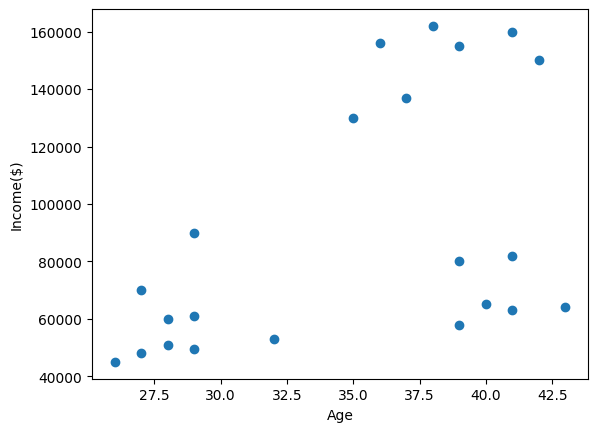

In [5]:
plt.scatter(data['Age'], data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [6]:
X = data[['Age', 'Income($)']]

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [9]:
## clusters
y_pred = km.predict(X)
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [10]:
data['cluster'] = y_pred
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [11]:
data1 = data[data['cluster'] == 0]
data2 = data[data['cluster'] == 1]
data3 = data[data['cluster'] == 2]

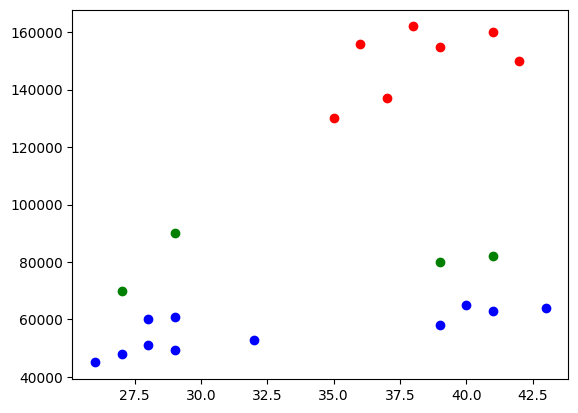

In [12]:
plt.scatter(data1['Age'], data1['Income($)'], color='green')
plt.scatter(data2['Age'], data2['Income($)'], color='red')
plt.scatter(data3['Age'], data3['Income($)'], color='blue')

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

In [17]:
data.head()

,Name,Age,Income($),cluster
0,Rob,-1.356055,-0.480684,0
1,Michael,-1.009157,-0.010159,0
2,Mohan,-1.009157,-0.692421,2
3,Ismail,-1.182606,-0.715947,2
4,Kory,1.245679,1.401417,1


In [18]:
X = data[['Age', 'Income($)']]

In [19]:
X

,Age,Income($)
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417
5,0.725332,1.519048
6,1.072230,1.636679
7,0.551883,1.683732
8,0.204985,1.542574
9,0.031536,0.930891


In [20]:
km = KMeans(n_clusters=3)
km.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [21]:
y_pred = km.predict(X)
data['cluster'] = y_pred
data.head()

,Name,Age,Income($),cluster
0,Rob,-1.356055,-0.480684,0
1,Michael,-1.009157,-0.010159,0
2,Mohan,-1.009157,-0.692421,0
3,Ismail,-1.182606,-0.715947,0
4,Kory,1.245679,1.401417,1


In [22]:
data1 = data[data['cluster'] == 0]
data2 = data[data['cluster'] == 1]
data3 = data[data['cluster'] == 2]

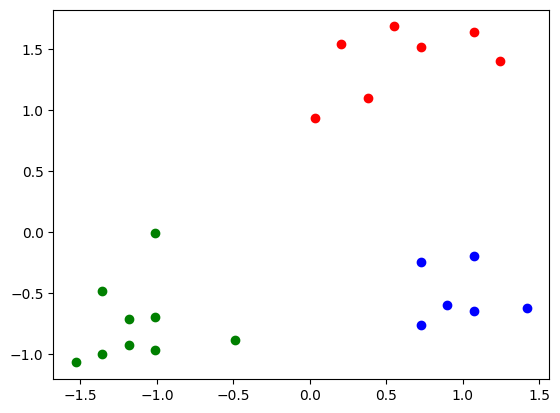

In [23]:
plt.scatter(data1['Age'], data1['Income($)'], color='green')
plt.scatter(data2['Age'], data2['Income($)'], color='red')
plt.scatter(data3['Age'], data3['Income($)'], color='blue')

In [24]:
## Elbow Curve Method
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

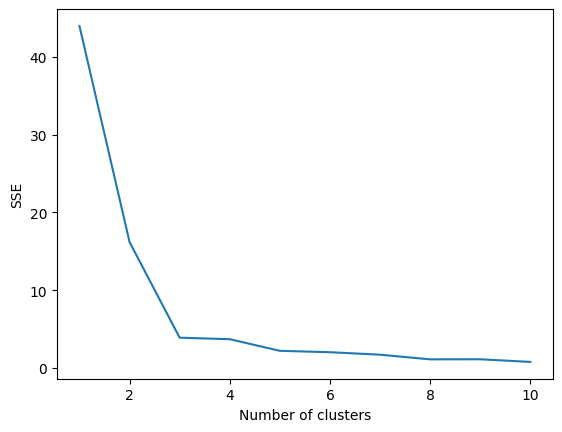

In [25]:
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

## Exercise


In [26]:
from sklearn.datasets import make_blobs

In [27]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2)

array([[ 8.98302241, -2.80115299],
       [-7.3636874 ,  4.51487015],
       [ 1.22226854,  8.82386304],
       [ 9.15865001, -2.53615447],
       [10.74859093, -1.66580718],
       [ 5.67966184,  9.41682475],
       [ 2.16121572,  7.47922216],
       [ 2.09980386,  8.76331075],
       [-6.2361119 ,  4.27557876],
       [-6.49009114,  3.27425388],
       [10.81888838, -1.33679134],
       [ 2.15142313,  9.97314201],
       [-7.19634501,  3.77606252],
       [ 2.53862257,  8.41098896],
       [-5.77395663,  3.87321636],
       [10.40878595, -2.11123929],
       [-7.24096497,  4.41053678],
       [ 9.29455474, -2.66101855],
       [ 1.83470461,  7.97552783],
       [-5.05591738,  4.7524515 ],
       [10.90328606, -2.31987965],
       [ 4.09874814,  6.97450526],
       [10.14067799, -1.62690406],
       [ 1.80041292,  8.32665878],
       [ 8.5857066 , -2.5772001 ],
       [ 2.85670719,  8.84030479],
       [ 3.03493586,  7.13446849],
       [ 3.01494156,  8.35622887],
       [-5.61266865,